<a href="https://colab.research.google.com/github/gtvastella/tt003/blob/main/atv6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
rewards = np.array([[0, -10, -10, -10, -7, -7, -10, -10, -10, -10],
                    [-10, -7, -7, -7, -7, -7, -7, -7, -7, -10],
                    [-10, -7, -4, -4, -4, -4, -4, -4, -7, -10],
                    [-10, -7, -4, -4, -1, -1, -4, -4, -7, -10],
                    [-10, -7, -4, -4, -1, -1, -1, -4, -7, -10],
                    [-10, -7, -4, -4, -1, -1, -1, -4, -7, -10],
                    [-10, -7, -4, -4, -1, -1, -4, -4, -7, -10],
                    [-10, -7, -4, -4, -4, -4, -4, -4, -7, -10],
                    [-10, -7, -7, -7, -7, -7, -7, -7, -7, -10],
                    [-10, -10, -10, -10, -7, -7, -10, -10, -10, 0]])
siderewards = np.zeros((rewards.shape[0], rewards.shape[1], 4), dtype=np.ndarray)
sidedistances = np.zeros((rewards.shape[0], rewards.shape[1], 4), dtype=np.ndarray)



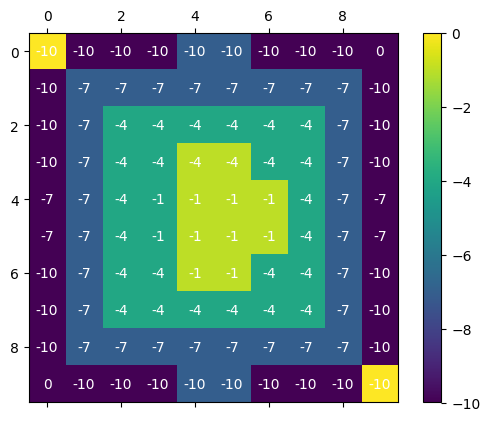

In [ ]:


def getReward(x,y):

  x = int(x)
  y = int(y)
  if x > 10 or x < 1 or y > 10 or y < 1:
    return np.nan

  xn = x-1
  yn = 10-y

  return rewards[yn][xn]

def getRewardStr(xy):
  x = int(xy.split(",")[0])
  y = int(xy.split(",")[1])

  if x > 10 or x < 1 or y > 10 or y < 1:
    return np.nan

  xn = x-1
  yn = 10-y

  return int(rewards[yn][xn])

def getRewards(vec):

  rwr = np.array([])

  for pos in vec:

    x = int(pos.split(",")[0])
    y = int(pos.split(",")[1])

    if x > 10 or x < 1 or y > 10 or y < 1:
      continue

    xn = x-1
    yn = 10-y

    rwr = np.append(rwr, rewards[yn][xn])

  return rwr


def getSurroundingRewards(x, y):

    rewardUp =  np.nan
    rewardDown = np.nan
    rewardLeft = np.nan
    rewardRight = np.nan

    try:
      rewardUp = getReward(x, y+1)
    except:
      pass
    try:
      rewardDown =  getReward(x, y-1)
    except:
      pass
    try:
      rewardLeft = getReward(x-1, y)
    except:
      pass
    try:
      rewardRight =  getReward(x+1, y)
    except:
      pass

    return np.array([rewardUp, rewardDown, rewardLeft, rewardRight])

def getSurroundingDistances(x, y, x1, x2):

    distanceUp =  np.nan
    distanceDown = np.nan
    distanceLeft = np.nan
    distanceRight = np.nan

    try:
      distanceUp = euclideanDistance(x, y+1, x1, x2)
    except:
      pass
    try:
      distanceDown =  euclideanDistance(x, y-1, x1, x2)
    except:
      pass
    try:
      distanceLeft = euclideanDistance(x-1, y, x1, x2)
    except:
      pass
    try:
      distanceRight =  euclideanDistance(x+1, y, x1, x2)
    except:
      pass

    return np.array([distanceUp, distanceDown, distanceLeft, distanceRight])


def setSideRewards():
  for y in np.arange(10):
    for x in np.arange(10):
      siderewards[9-y][x] = getSurroundingRewards(x+1,y+1)

def setSideDistances(xGoal, yGoal):
  for y in np.arange(10):
    for x in np.arange(10):
      sidedistances[9-y][x] = getSurroundingDistances(x+1,y+1, xGoal, yGoal)


def getSideRewards(x,y):

  x = int(x)
  y = int(y)
  return siderewards[x][y]

def getSideDistances(x,y):

  x = int(x)
  y = int(y)
  return sidedistances[x][y]



def toString(x,y):

  return (str(x) + "," + str(y))

def fromString(xy):

    x = int(xy.split(",")[0])
    y = int(xy.split(",")[1])
    return int(x),int(y)

def getSideLocations(x,y):


  sides =  np.array([]).astype(str)
  if (x+1 < 11):
    sides = np.append(sides, toString(x+1, y))

  if (x-1 >0):
    sides =  np.append(sides, toString(x-1, y))

  if (y+1 < 11):
    sides =  np.append(sides, toString(x, y+1))

  if (y-1 >0):
    sides =  np.append(sides, toString(x, y-1))

  return sides



def manhattanDistance(x1, y1, x2, y2):
    return np.abs(x2 - x1) + np.abs(y2 - y1)

def euclideanDistance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)




def showGridPlot(coords = []):


  rws = [[getReward(x, y) if toString(x, y) not in coords else "("+str(np.where(np.array(coords) == toString(x,y))[0][0])+")" for y in range(1, 11)] for x in range(1, 11)]

  # Plotar o gráficol.
  fig, ax = plt.subplots()
  cax = ax.matshow(rewards, cmap='viridis')  # Escolha um mapa de cores que você goste

  # Adicionar texto com os valores de recompensa em cada célula
  for i in range(10):
      for j in range(10):
          ax.text(j, i, str(rws[i][j]), va='center', ha='center', color="white")

  # Adicionar uma barra de cores
  fig.colorbar(cax)

  # Mostrar o gráfico
  plt.show()
showGridPlot()


In [ ]:
setSideRewards()
setSideDistances(1,10)

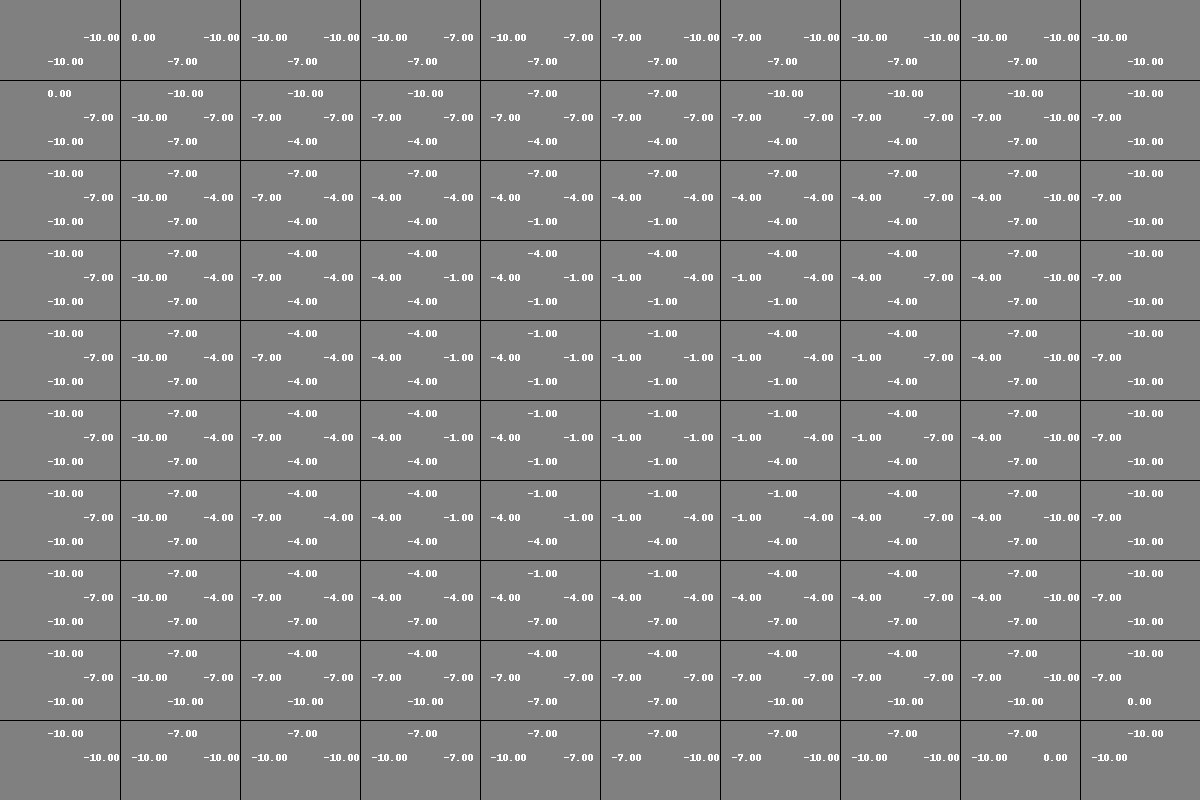

Distância


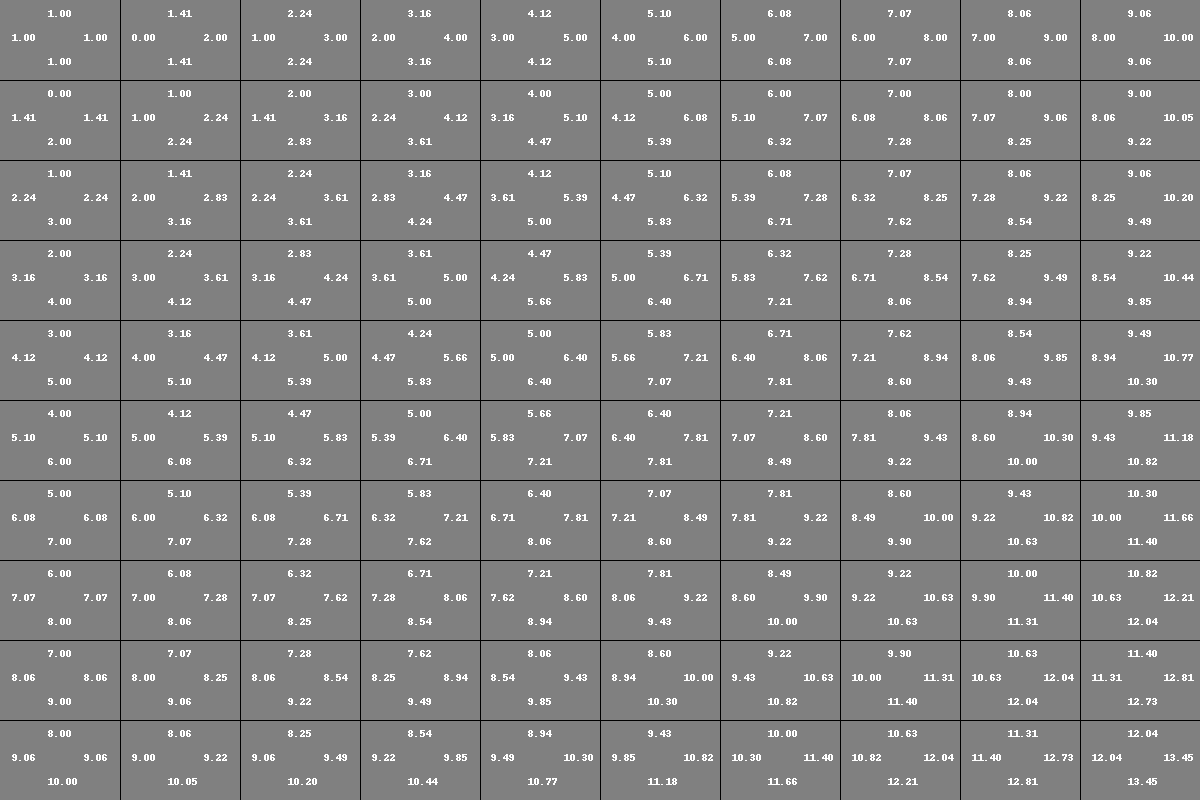

In [ ]:
from IPython.display import display # para mostrar imagens
from PIL import Image, ImageDraw    # para ler imagens



def draw_policy(dim = 400, dist = False) :
    board = Image.new('RGB', (3*dim, 2*dim),  "gray")
    draw  = ImageDraw.Draw(board)

    lines   = 10
    columns = 10

    ## Linhas e Colunas
    shift_lines = float(board.size[1])/lines
    for el in range(lines) :
        draw.line( (0, shift_lines *(el+1), board.size[0], shift_lines*(el+1)), fill = "black" )

    ## Linhas e Colunas
    shift_columns = float(board.size[0])/columns
    for el in range(columns) :
        draw.line( (shift_columns*(el+1), 0, shift_columns*(el+1), board.size[1]), fill = "black" )

    for x in np.arange(10) :
        for y in np.arange(10) :

          rw = getSideRewards(x,y) if not dist else getSideDistances(x,y)
          lpolicy = rw

          draw.text((shift_columns*(y+0.4),shift_lines*(x+0.1)), ("%.2f" % (lpolicy[0])) if not np.isnan(lpolicy[0]) else (""))
          draw.text((shift_columns*(y+0.7),shift_lines*(x+0.4)), ("%.2f" % (lpolicy[3])) if not np.isnan(lpolicy[3]) else  (""))
          draw.text((shift_columns*(y+0.4),shift_lines*(x+0.7)), ("%.2f" % (lpolicy[1])) if not np.isnan(lpolicy[1]) else  (""))
          draw.text((shift_columns*(y+0.1),shift_lines*(x+0.4)), ("%.2f" % (lpolicy[2])) if not np.isnan(lpolicy[2]) else (""))
    return board

display(draw_policy())

print("Distância")


display(draw_policy(dist=True))

In [ ]:
import random

def bothSearch():
  currentX = 10
  currentY = 1
  goalX = 1
  goalY = 10
  visited = np.array([])
  visited = np.append(visited, toString(currentX,currentY))
  moves = 1
  accum = 0
  path = ""


  while (currentX != goalX and currentY != goalY):

    avaliableSides = getSideLocations(currentX, currentY)
    avaliableSides = np.setdiff1d(avaliableSides,visited)
    distances = {}
    avaliableRewards = {}

    for side in avaliableSides:
      distances[side] = euclideanDistance(int(side.split(",")[0]), int(side.split(",")[1]), goalX, goalY)
    min_dist = np.where(list(distances.values()) == np.min(list(distances.values())))
    min_dist = np.array(min_dist)[0]


    if (len(min_dist) > 1):

      nextRewards = {}
      for j in min_dist:
        key = list(distances.keys())[j]
        newX, newY = fromString(key)

        nextRewards[toString(newX, newY)]= getReward(int(newX), int(newY))



      max_rewards = np.where(list(nextRewards.values()) == np.max(list(nextRewards.values())))
      max_rewards = np.array(max_rewards)[0]

      if (len(max_rewards) > 1):

        rd = random.choice(max_rewards)
        key = list(nextRewards.keys())[rd]
        currentX, currentY = fromString(key)
        visited = np.append(visited, toString(currentX, currentY))
        path+=toString(currentX, currentY) + " > "
        accum+=getReward(currentX, currentY)
        moves+=1
      else:

        minim = np.argmax(list(nextRewards.values()))
        key = list(nextRewards.keys())[minim]
        currentX, currentY = fromString(key)
        visited =  np.append(visited, toString(currentX, currentY))
        path+=toString(currentX, currentY) + " > "
        accum+=getReward(currentX, currentY)
        moves+=1
    else:
      i = np.argmin(list(distances.values()))

      maxr = avaliableSides[i]
      currentX, currentY = fromString(maxr)
      visited =  np.append(visited, toString(currentX, currentY))
      path+=toString(currentX, currentY) + " > "
      accum+=getReward(currentX, currentY)
      moves+=1

  path+=f"{goalX},{goalY}"
  return accum, moves, path



In [ ]:
import time


In [ ]:
results = []
moves = []
paths = []
tempo_inicial = time.time()
for x in np.arange(1000):
  r, m, p = bothSearch()
  results = np.append(results, r)
  moves = np.append(moves, m)
  paths = np.append(paths, p)
tempo_final = time.time()

tempo_execucao = tempo_final - tempo_inicial
print("Custo mínimo:" + str(np.max(results)))
print("Custo máximo:" + str(np.min(results)))
print("Mínimo de movimentos:" + str(np.min(moves)))
print("Máximo de movimentos:" + str(np.max(moves)))
print("Caminhos possíveis: " +str(np.unique(paths.tolist()).size))
print("Exemplo de caminho: " +str(random.choice(paths)))
print(f'Tempo de execução: {tempo_execucao} segundos')

Custo mínimo:-77.0
Custo máximo:-77.0
Mínimo de movimentos:18.0
Máximo de movimentos:18.0
Caminhos possíveis: 253
Exemplo de caminho: 10,2 > 9,2 > 9,3 > 8,3 > 7,3 > 7,4 > 6,4 > 6,5 > 5,5 > 5,6 > 5,7 > 4,7 > 4,8 > 3,8 > 3,9 > 2,9 > 2,10 > 1,10
Tempo de execução: 4.254976511001587 segundos
